<h3> Goal : </h3>

1. Developing and testing healthcare predictive models.
2. Following data cleaning, transformation, and analysis techniques.
3. Creating data visualizations to gain insights into healthcare trends.
4. Multi-Class Classification Problem and solve it for Test Results which contains 3 categories(Normal, Abnormal, and Inconclusive).

<h5> Dataset Information:
Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset - </h5>

Name: This column represents the name of the patient associated with the healthcare record.

Age: The age of the patient at the time of admission, expressed in years.

Gender: Indicates the gender of the patient, either "Male" or "Female."

Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).

Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.

Date of Admission: The date on which the patient was admitted to the healthcare facility.

Doctor: The name of the doctor responsible for the patient's care during their admission.

Hospital: Identifies the healthcare facility or hospital where the patient was admitted.

Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and 
"Medicare."

Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.

Room Number: The room number where the patient was accommodated during their admission.

Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.

Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.

Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and 
"Lipitor."

Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the 
outcome of the test.

<h4>Standard Libraries</h4>

In [1]:
import warnings

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, train_test_split, HalvingRandomSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score,roc_auc_score, recall_score, accuracy_score,f1_score,classification_report
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import make_column_transformer
from sklearn.multiclass import OneVsRestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.ensemble import EasyEnsembleClassifier

from sklearn.model_selection import cross_val_score
from collections import Counter

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import auc as skl_auc

from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#from scikeras.wrappers import KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


import torch # install pytorch using https://pytorch.org/
import torch.nn as nn
import torch.optim as optim

warnings.simplefilter(action='ignore', category=FutureWarning)
set_config("display")

<h4>Reading the Data</h4>

In [3]:
data = pd.read_csv('data/healthcare_dataset.csv')

In [4]:
data

Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1            2019-08-20   Samantha Davies                       Kim Inc   
2            2022-09-22  Tiffany Mitchell                      Cook PLC   
3            2020-11-18       Kevin Wells    Hernandez Rogers and Vang,   
4            2022-09-19    Kathleen Hanna                   White-White   
...                 ...               ...                           ...   
55495        2020-08-16     Joshua Jarvis                Jones-Thompson   
55496        2020-01-23   Taylor Sullivan                  Tucker-Moyer   
55497        2020-07-13    Joe Jacobs DVM  and Mahoney Johnson Vasquez,   
55498        2019-05-25    Kimberly Curry      Jackson Todd and Castro,   
55499        2024-04-02     Dennis Warren                Henry Sons and   

      Insurance Provider  Billing Amount  Room Number Admission Type  \
0             Blue Cross    18856.281306          328         Urgent   
1               Medicare    33643.327287          265      Emergency   
2                  Aetna    27955.096079          205      Emergency   
3               Medicare    37909.782410          450       Elective   
4                  Aetna    14238.317814          458         Urgent   
...                  ...             ...          ...            ...   
55495         Blue Cross     2650.714952          417       Elective   
55496              Cigna    31457.797307          316       Elective   
55497   UnitedHealthcare    27620.764717          347         Urgent   
55498           Medicare    32451.092358          321       Elective   
55499              Aetna     4010.134172          448         Urgent   

      Discharge Date   Medication  Test Results  
0         2024-02-02  Paracetamol        Normal  
1         2019-08-26    Ibuprofen  Inconclusive  
2         2022-10-07      Aspirin        Normal  
3         2020-12-18    Ibuprofen      Abnormal  
4         2022-10-09   Penicillin      Abnormal  
...              ...          ...           ...  
55495     2020-09-15   Penicillin      Abnormal  
55496     2020-02-01      Aspirin        Normal  
55497     2020-08-10    Ibuprofen      Abnormal  
55498     2019-05-31    Ibuprofen      Abnormal  
55499     2024-04-29    Ibuprofen      Abnormal  

[55500 rows x 15 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

<h4>Feature Engineering</h4>

In [6]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [7]:
data['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

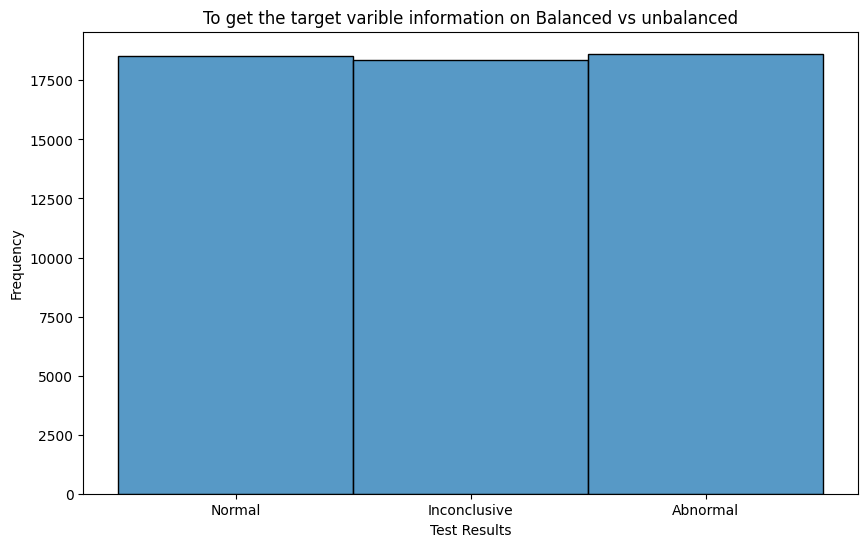

<Figure size 640x480 with 0 Axes>

In [8]:
#visualize the classifiers of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Test Results'])
plt.title('To get the target varible information on Balanced vs unbalanced')
plt.xlabel('Test Results')
plt.ylabel('Frequency')
plt.show()
plt.savefig('images/balancedvsunbalanced.png')

In [9]:
data.shape

(55500, 15)

In [10]:
#Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results

In [11]:
data = data.drop(['Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number'], axis=1)

In [12]:
data.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

  Admission Type Discharge Date   Medication  Test Results  
0         Urgent     2024-02-02  Paracetamol        Normal  
1      Emergency     2019-08-26    Ibuprofen  Inconclusive  
2      Emergency     2022-10-07      Aspirin        Normal  
3       Elective     2020-12-18    Ibuprofen      Abnormal  
4         Urgent     2022-10-09   Penicillin      Abnormal

In [13]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])

In [14]:
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Name               55500 non-null  object        
 1   Age                55500 non-null  int64         
 2   Gender             55500 non-null  object        
 3   Blood Type         55500 non-null  object        
 4   Medical Condition  55500 non-null  object        
 5   Date of Admission  55500 non-null  datetime64[ns]
 6   Admission Type     55500 non-null  object        
 7   Discharge Date     55500 non-null  datetime64[ns]
 8   Medication         55500 non-null  object        
 9   Test Results       55500 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 4.2+ MB


In [16]:
data.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

  Admission Type Discharge Date   Medication  Test Results  
0         Urgent     2024-02-02  Paracetamol        Normal  
1      Emergency     2019-08-26    Ibuprofen  Inconclusive  
2      Emergency     2022-10-07      Aspirin        Normal  
3       Elective     2020-12-18    Ibuprofen      Abnormal  
4         Urgent     2022-10-09   Penicillin      Abnormal

In [17]:
# transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['Name', 'Gender', 'Blood Type', 'Medical Condition',
#        'Admission Type', 'Medication', 'Test Results']),remainder = 'passthrough')
# data_transformed = transformer.fit_transform(data).toarray()

<h6>Transforming the categorical features</h6>

In [18]:
data['Name'].unique()

array(['Bobby JacksOn', 'LesLie TErRy', 'DaNnY sMitH', ...,
       'LiSa sIMPsoN', 'RoGER farRELl', 'kaTheRIne WeBSTer'], dtype=object)

In [19]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [20]:
data['Blood Type'].unique()

array(['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'], dtype=object)

In [21]:
data['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [22]:
data['Admission Type'].unique()

array(['Urgent', 'Emergency', 'Elective'], dtype=object)

In [23]:
data.Medication.unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

In [24]:
data['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [25]:
#Transforming the categorical features
oe = OrdinalEncoder(categories = [['Male', 'Female']])
data['Gender_coder'] = oe.fit_transform(data[['Gender']])

In [26]:
oe = OrdinalEncoder(categories = [['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-']])
data['BT_coder'] = oe.fit_transform(data[['Blood Type']])

In [27]:
oe = OrdinalEncoder(categories = [['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis']])
data['MC_coder'] = oe.fit_transform(data[['Medical Condition']])

In [28]:
oe = OrdinalEncoder(categories = [['Urgent', 'Emergency', 'Elective']])
data['AT_coder'] = oe.fit_transform(data[['Admission Type']])

In [29]:
oe = OrdinalEncoder(categories = [['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor']])
data['Medication_coder'] = oe.fit_transform(data[['Medication']])

In [30]:
# Set the index as Name to recoginze the patient
data = data.set_index('Name')

In [31]:
data.head()

Age  Gender Blood Type Medical Condition Date of Admission  \
Name                                                                        
Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
LesLie TErRy    62    Male         A+           Obesity        2019-08-20   
DaNnY sMitH     76  Female         A-           Obesity        2022-09-22   
andrEw waTtS    28  Female         O+          Diabetes        2020-11-18   
adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

              Admission Type Discharge Date   Medication  Test Results  \
Name                                                                     
Bobby JacksOn         Urgent     2024-02-02  Paracetamol        Normal   
LesLie TErRy       Emergency     2019-08-26    Ibuprofen  Inconclusive   
DaNnY sMitH        Emergency     2022-10-07      Aspirin        Normal   
andrEw waTtS        Elective     2020-12-18    Ibuprofen      Abnormal   
adrIENNE bEll         Urgent     2022-10-09   Penicillin      Abnormal   

               Gender_coder  BT_coder  MC_coder  AT_coder  Medication_coder  
Name                                                                         
Bobby JacksOn           0.0       0.0       0.0       0.0               0.0  
LesLie TErRy            0.0       1.0       1.0       1.0               1.0  
DaNnY sMitH             1.0       2.0       1.0       1.0               2.0  
andrEw waTtS            1.0       3.0       2.0       2.0               1.0  
adrIENNE bEll           1.0       4.0       0.0       0.0               3.0

In [32]:
data = data.drop(['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication'], axis=1)

In [33]:
data

Age Date of Admission Discharge Date  Test Results  \
Name                                                                    
Bobby JacksOn       30        2024-01-31     2024-02-02        Normal   
LesLie TErRy        62        2019-08-20     2019-08-26  Inconclusive   
DaNnY sMitH         76        2022-09-22     2022-10-07        Normal   
andrEw waTtS        28        2020-11-18     2020-12-18      Abnormal   
adrIENNE bEll       43        2022-09-19     2022-10-09      Abnormal   
...                ...               ...            ...           ...   
eLIZABeTH jaCkSOn   42        2020-08-16     2020-09-15      Abnormal   
KYle pEREz          61        2020-01-23     2020-02-01        Normal   
HEATher WaNG        38        2020-07-13     2020-08-10      Abnormal   
JENniFER JOneS      43        2019-05-25     2019-05-31      Abnormal   
jAMES GARCiA        53        2024-04-02     2024-04-29      Abnormal   

                   Gender_coder  BT_coder  MC_coder  AT_coder  \
Name                                                            
Bobby JacksOn               0.0       0.0       0.0       0.0   
LesLie TErRy                0.0       1.0       1.0       1.0   
DaNnY sMitH                 1.0       2.0       1.0       1.0   
andrEw waTtS                1.0       3.0       2.0       2.0   
adrIENNE bEll               1.0       4.0       0.0       0.0   
...                         ...       ...       ...       ...   
eLIZABeTH jaCkSOn           1.0       3.0       3.0       2.0   
KYle pEREz                  1.0       5.0       1.0       2.0   
HEATher WaNG                1.0       6.0       4.0       0.0   
JENniFER JOneS              0.0       7.0       5.0       2.0   
jAMES GARCiA                1.0       3.0       5.0       0.0   

                   Medication_coder  
Name                                 
Bobby JacksOn                   0.0  
LesLie TErRy                    1.0  
DaNnY sMitH                     2.0  
andrEw waTtS                    1.0  
adrIENNE bEll                   3.0  
...                             ...  
eLIZABeTH jaCkSOn               3.0  
KYle pEREz                      2.0  
HEATher WaNG                    1.0  
JENniFER JOneS                  1.0  
jAMES GARCiA                    1.0  

[55500 rows x 9 columns]

<h4> Splitting the Data to X and y</h4>

In [34]:
X = data.drop('Test Results', axis=1)
y = data['Test Results']

In [35]:
X.head()

Age Date of Admission Discharge Date  Gender_coder  BT_coder  \
Name                                                                          
Bobby JacksOn   30        2024-01-31     2024-02-02           0.0       0.0   
LesLie TErRy    62        2019-08-20     2019-08-26           0.0       1.0   
DaNnY sMitH     76        2022-09-22     2022-10-07           1.0       2.0   
andrEw waTtS    28        2020-11-18     2020-12-18           1.0       3.0   
adrIENNE bEll   43        2022-09-19     2022-10-09           1.0       4.0   

               MC_coder  AT_coder  Medication_coder  
Name                                                 
Bobby JacksOn       0.0       0.0               0.0  
LesLie TErRy        1.0       1.0               1.0  
DaNnY sMitH         1.0       1.0               2.0  
andrEw waTtS        2.0       2.0               1.0  
adrIENNE bEll       0.0       0.0               3.0

In [36]:
#Mapping the target feature 'y'
target_map = {'Normal': 0, 'Abnormal': 1, 'Inconclusive': 2}

In [37]:
y = y.map(target_map)

In [38]:
y

Name
Bobby JacksOn        0
LesLie TErRy         2
DaNnY sMitH          0
andrEw waTtS         1
adrIENNE bEll        1
                    ..
eLIZABeTH jaCkSOn    1
KYle pEREz           0
HEATher WaNG         1
JENniFER JOneS       1
jAMES GARCiA         1
Name: Test Results, Length: 55500, dtype: int64

<h3>EDA[Exploratory Data Analysis]</h3>

<h5> Understanding the Correation between the features for future analysis</h5>

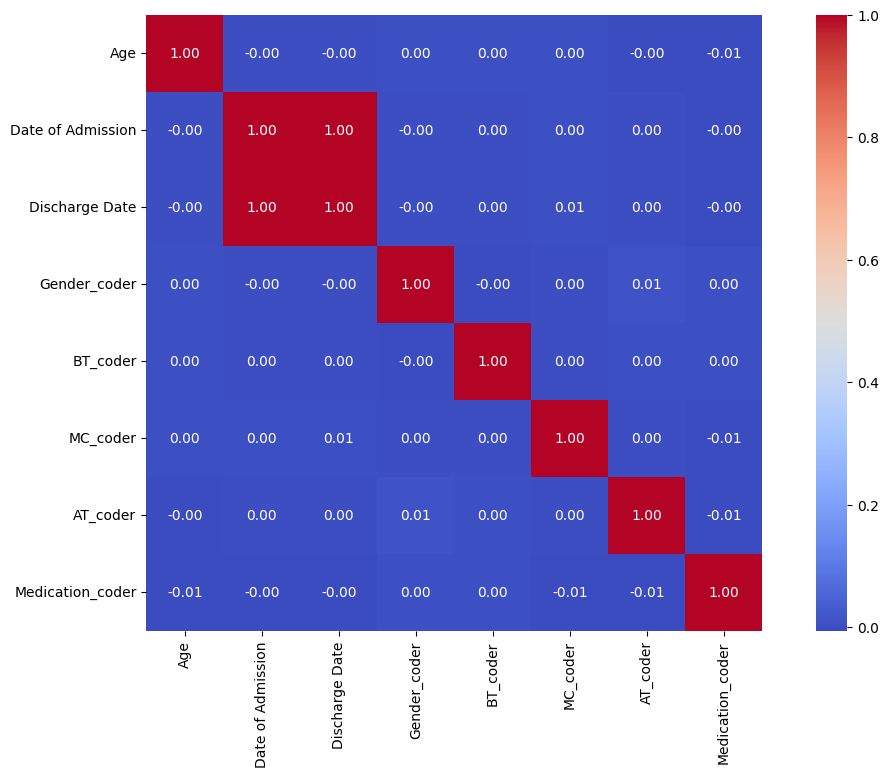

<Figure size 640x480 with 0 Axes>

In [39]:
# Correlation matrix and heatmap
correlation = X.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()
plt.savefig('images/heap_map.png')

In [40]:
#examine Correlations :
highest_corr = X.corr()[['Age']].nlargest(columns = 'Age', n = 2).index[1]
print(highest_corr)

BT_coder


In [41]:
highest_corr = X.corr()[['BT_coder']].nlargest(columns = 'BT_coder', n = 2).index[1]
print(highest_corr)

Medication_coder


<h5>Understanding the Age feature </h5>

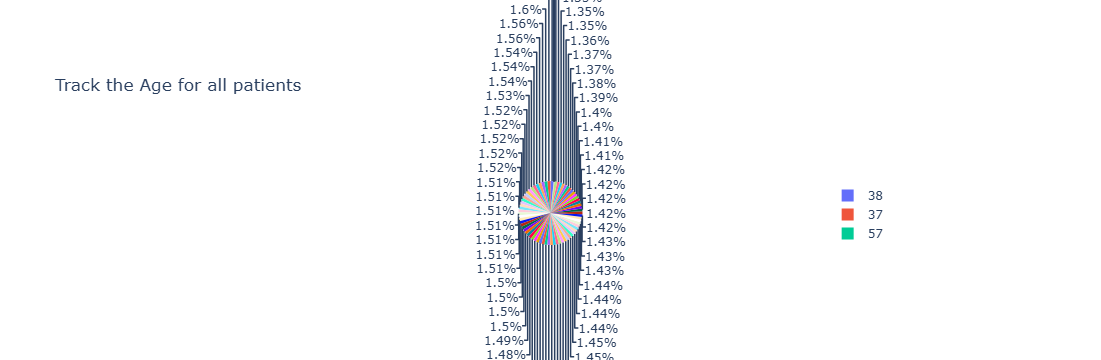

In [42]:
fig = px.pie(X['Age'].value_counts().reset_index(name='count'), values='count', names='Age', title='Track the Age for all patients')
fig.show()
fig.write_html("images/Age_Pie_Chart.png")

<h4>Three highest ages patients are 38, 37 and 57 respectively</h4>

<h4> Understand the Medical condition with Date of Admission</h4>

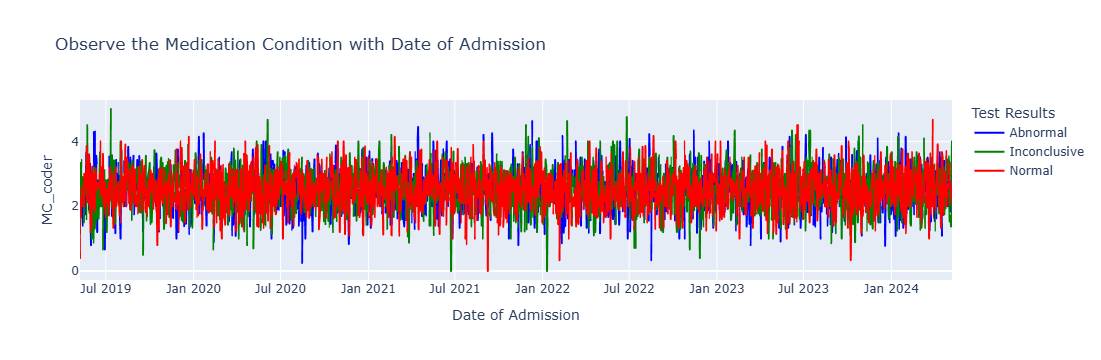

In [43]:
#Comparison between the Medical condition, Admission type and Date of admission.
fig = px.line(data[['Date of Admission', 'MC_coder','Test Results']].groupby(['Date of Admission', 'Test Results']).mean().sort_index().reset_index(),
              x='Date of Admission', y='MC_coder', color='Test Results',
              color_discrete_map={'Normal': 'red', 'Abnormal' : 'blue', 'Inconclusive' : 'green' },
              title = 'Observe the Medication Condition with Date of Admission')
fig.show()
fig.write_html("images/Meditcationcondition_DateofAdmission.png")

<h4> Understand the Admission Type with Date of Admission</h4>

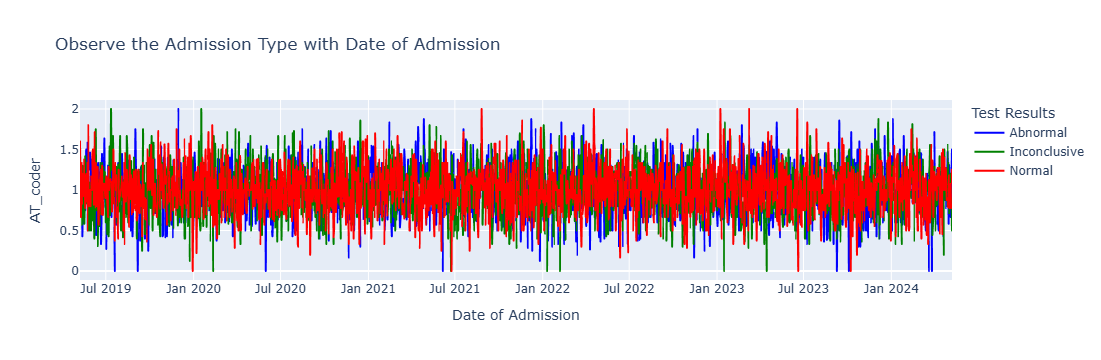

In [44]:
fig = px.line(data[['Date of Admission', 'AT_coder','Test Results']].groupby(['Date of Admission', 'Test Results']).mean().sort_index().reset_index(),
              x='Date of Admission', y='AT_coder', color='Test Results',
              color_discrete_map={'Normal': 'red', 'Abnormal' : 'blue', 'Inconclusive' : 'green' },
              title = 'Observe the Admission Type with Date of Admission')
fig.show()
fig.write_html("images/AdmissionType_DateofAdmission.png")

<h4> We do not get any clarity on the details above as all the Test Results are balanced out </h4>

<h4> Understand the most required Blood types</h4>

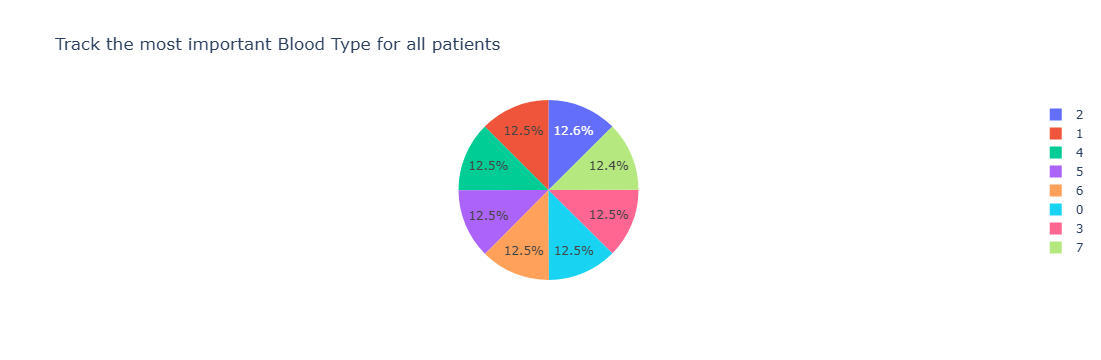

In [45]:
fig = px.pie(X['BT_coder'].value_counts().reset_index(name='count'), values='count', names='BT_coder', title='Track the most important Blood Type for all patients')
fig.show()
fig.write_html("images/BT_Pie_Chart.png")

<h5>the numeric blood type are associated below respectively : 

['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-'] -> ['0', '1', '2', '3', '4', '5', '6', '7']

</h5>

<h3>As you see above 'A-' is the most blood type required , however other blood types are equally required and no much percenatge difference</h3>

<h4> Understand the most required Medication</h4>

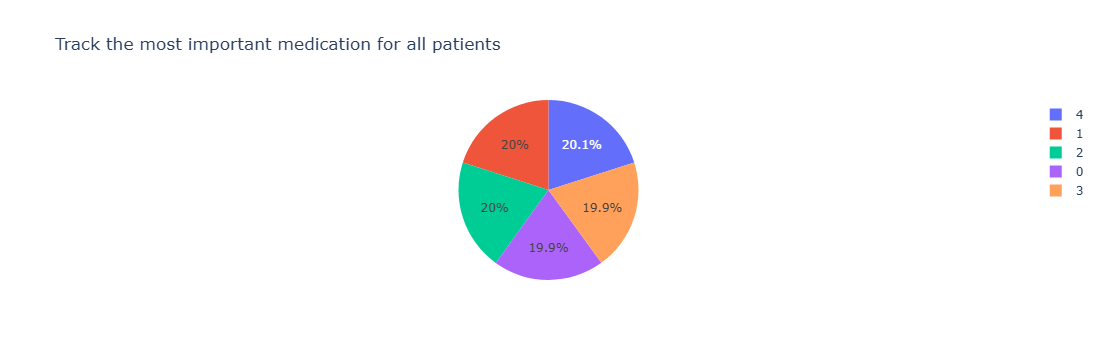

In [46]:
fig = px.pie(X['Medication_coder'].value_counts().reset_index(name='count'), values='count', names='Medication_coder', title='Track the most important medication for all patients')
fig.show()
fig.write_html("images/Medication_Pie_Chart.png")

<h5>the numeric Medication types are associated below respectively : 

['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'] -> ['0', '1', '2', '3', '4']

</h5>

<h4>The most required medication is Lipitor, however other medication are equally required</h4>

<h4> Validate the Skewness and Kurtosis for the numeric data</h4>

In [47]:
X.columns

Index(['Age', 'Date of Admission', 'Discharge Date', 'Gender_coder',
       'BT_coder', 'MC_coder', 'AT_coder', 'Medication_coder'],
      dtype='object')

In [48]:
#Defining varicale to use commonly use
numeric_data = ['Age', 'Gender_coder','BT_coder', 'MC_coder', 'AT_coder', 'Medication_coder']

In [49]:
data[numeric_data].skew()

Age                -0.005735
Gender_coder        0.001730
BT_coder            0.001995
MC_coder           -0.000500
AT_coder           -0.002623
Medication_coder    0.000120
dtype: float64

<Figure size 1000x600 with 0 Axes>

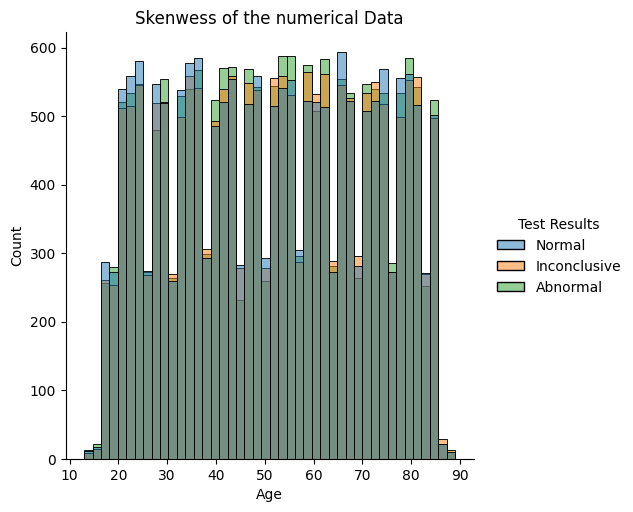

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

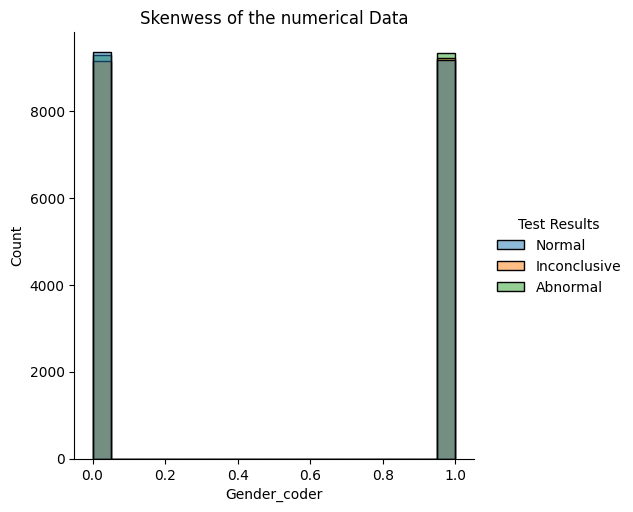

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

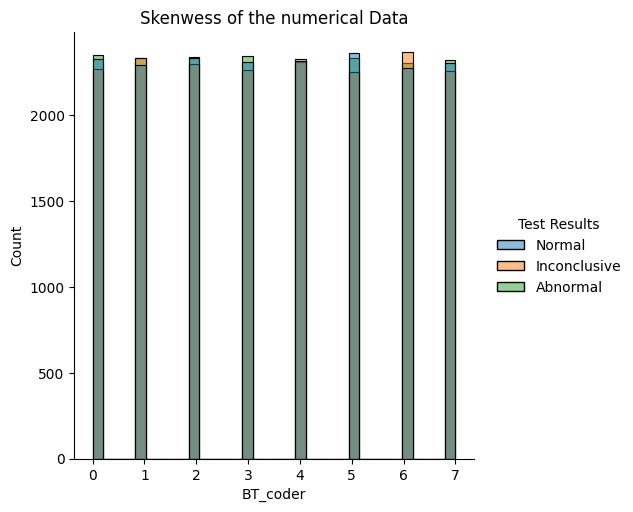

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

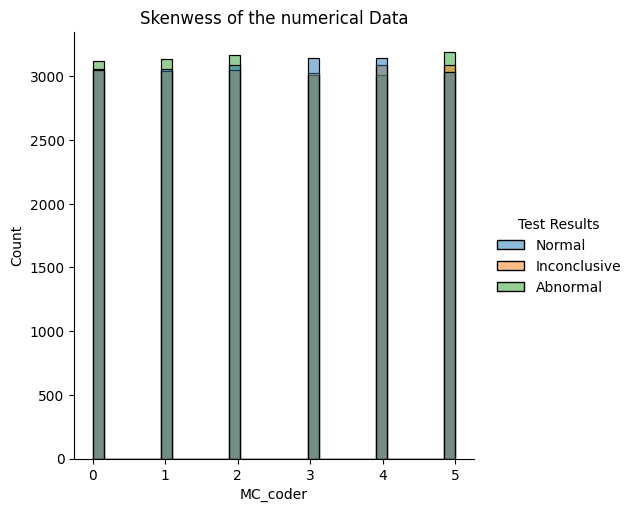

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

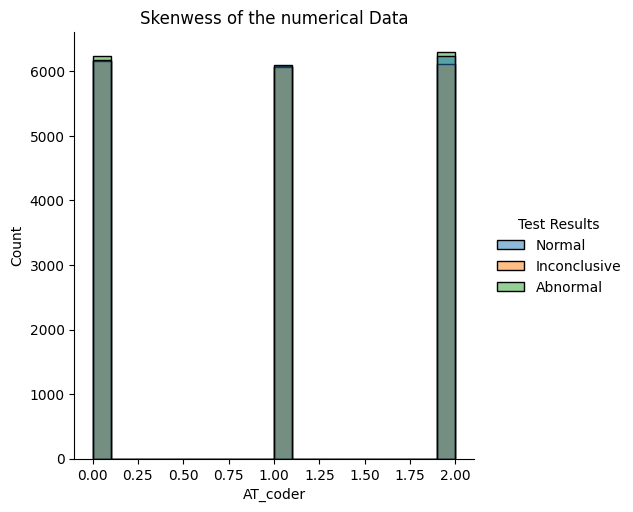

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

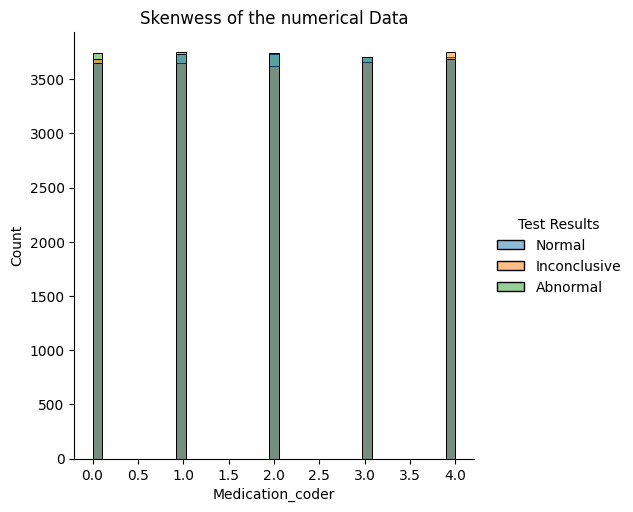

<Figure size 640x480 with 0 Axes>

In [50]:
#Visualize the Skenwess of the above 
for column in numeric_data:
    plt.figure(figsize=(10, 6))
    sns.displot(data, x=column, hue='Test Results')
    plt.title('Skenwess of the numerical Data')
    plt.show()
    plt.savefig('images/Historgram on the numerical data.png')

In [51]:
data[numeric_data].kurt()

Age                -1.185576
Gender_coder       -2.000069
BT_coder           -1.237593
MC_coder           -1.269410
AT_coder           -1.509326
Medication_coder   -1.300436
dtype: float64

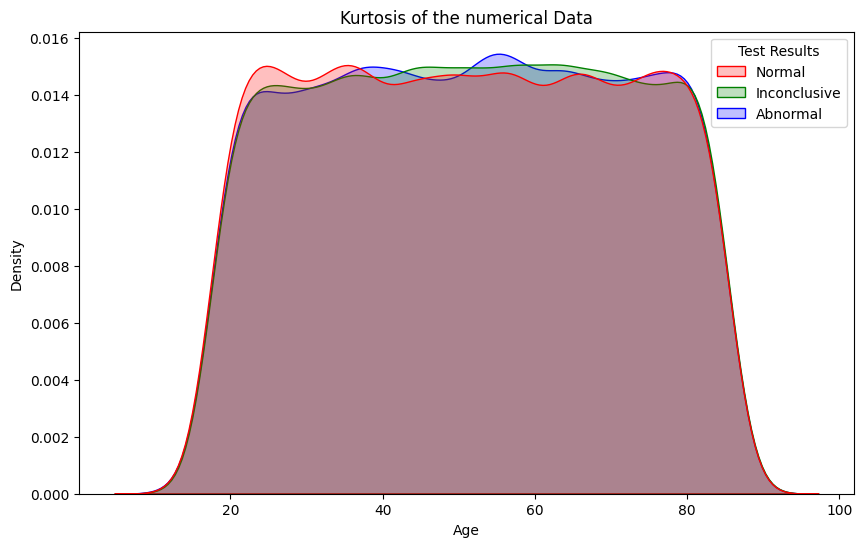

<Figure size 640x480 with 0 Axes>

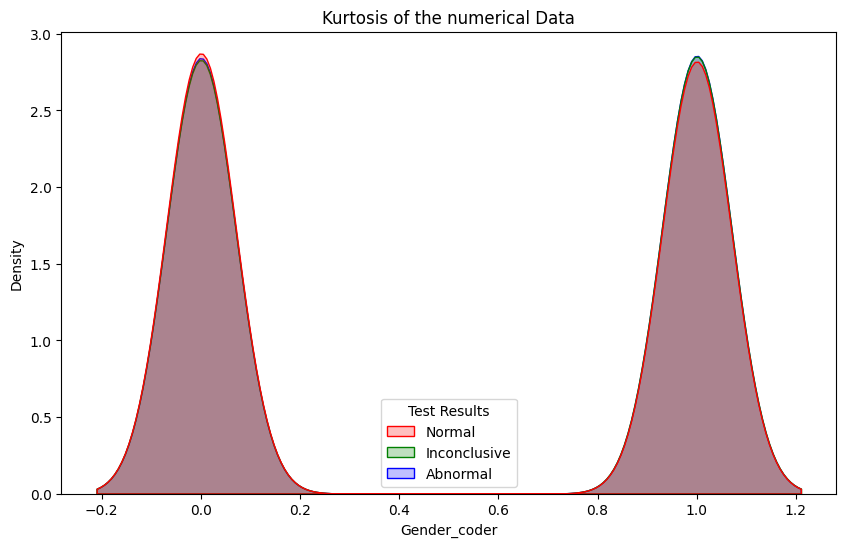

<Figure size 640x480 with 0 Axes>

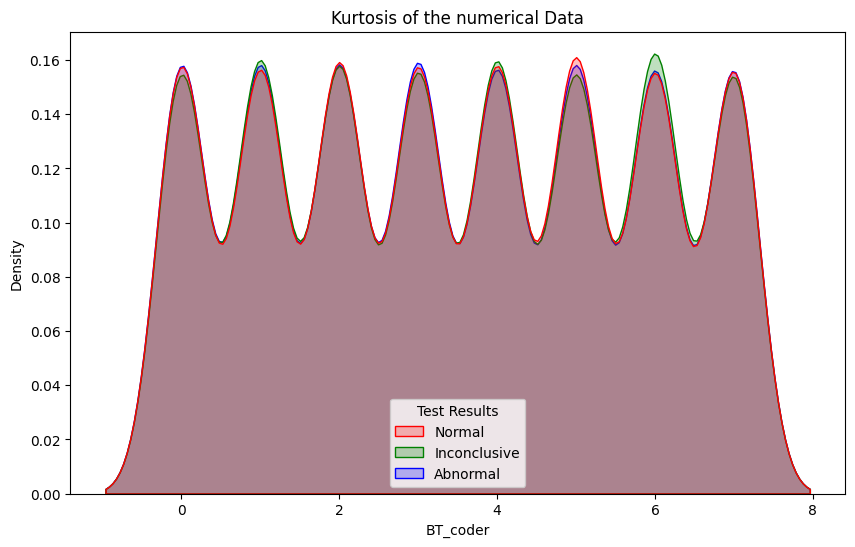

<Figure size 640x480 with 0 Axes>

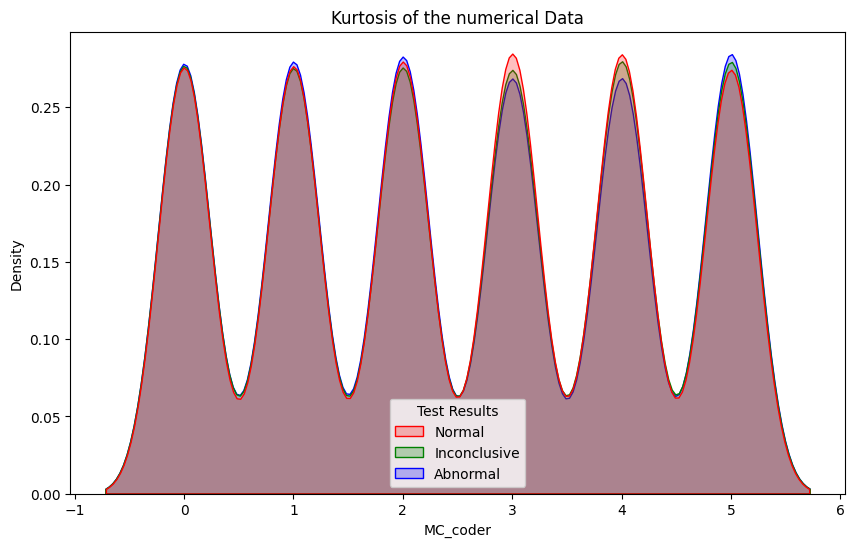

<Figure size 640x480 with 0 Axes>

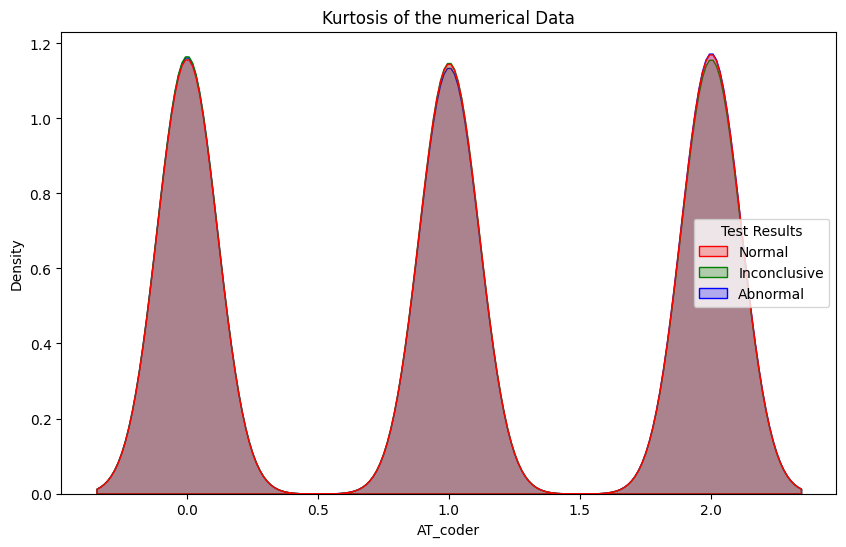

<Figure size 640x480 with 0 Axes>

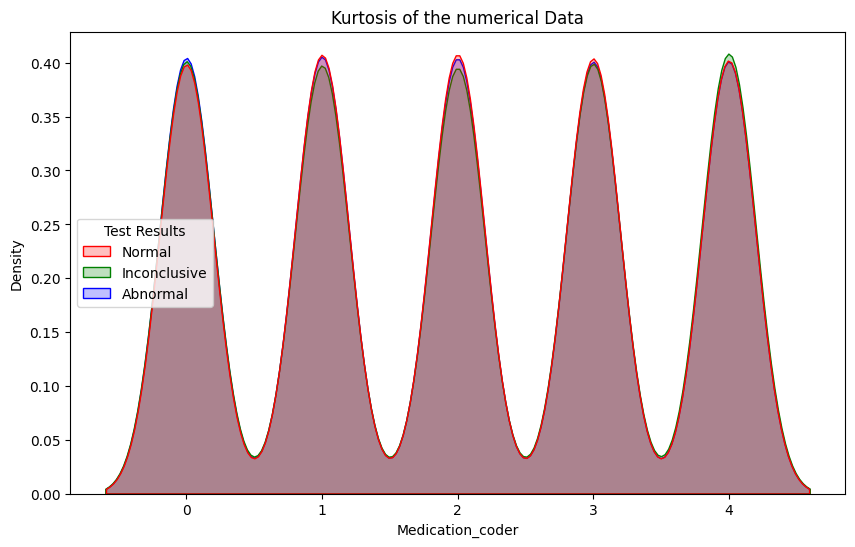

<Figure size 640x480 with 0 Axes>

In [52]:
#Visualize the Kurtosis of the above numerical_cols aata
for column in numeric_data:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data, x=column, hue='Test Results', palette={'Normal': 'red', 'Abnormal' : 'blue', 'Inconclusive' : 'green' }, common_norm=False, fill=True)
    plt.title('Kurtosis of the numerical Data')
    plt.show()
    plt.savefig('images/KDE on the Kurtosis_numerical data.png')

<h4> As you see above the skew and kurt are both balanced among the features. This makes it easy for the dataset as we do not have much of the noise/outliers in the data. However we we visualize the outlier below just to see if any</h4>

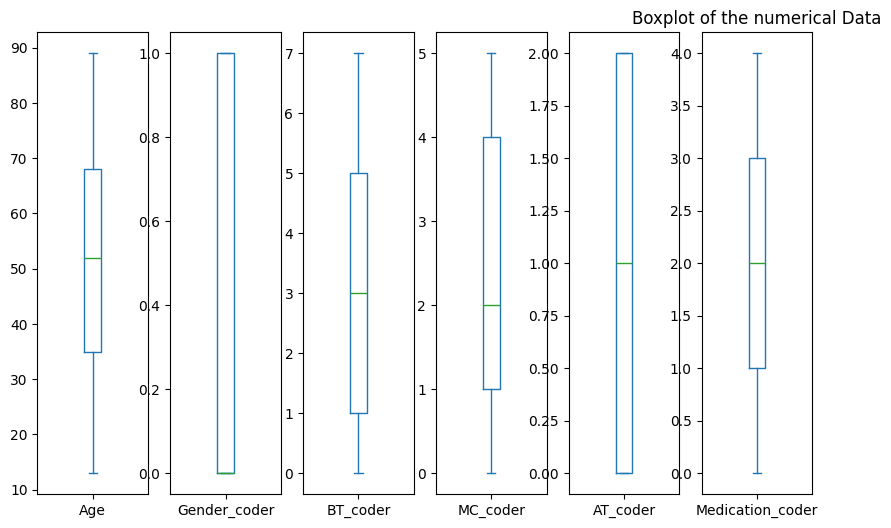

<Figure size 640x480 with 0 Axes>

In [53]:
#Visualize the Boxplots of the above numerical_cols data
data[numeric_data].plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6)) 
plt.title('Boxplot of the numerical Data')
plt.show()
plt.savefig('images/boxplots on the numerrical data.png')

<h4> As confirmed with Skewness Kurtosis , now in the box plot visualization we do not see any outliers for the data and can process with modelling</h4>

<Figure size 1400x800 with 0 Axes>

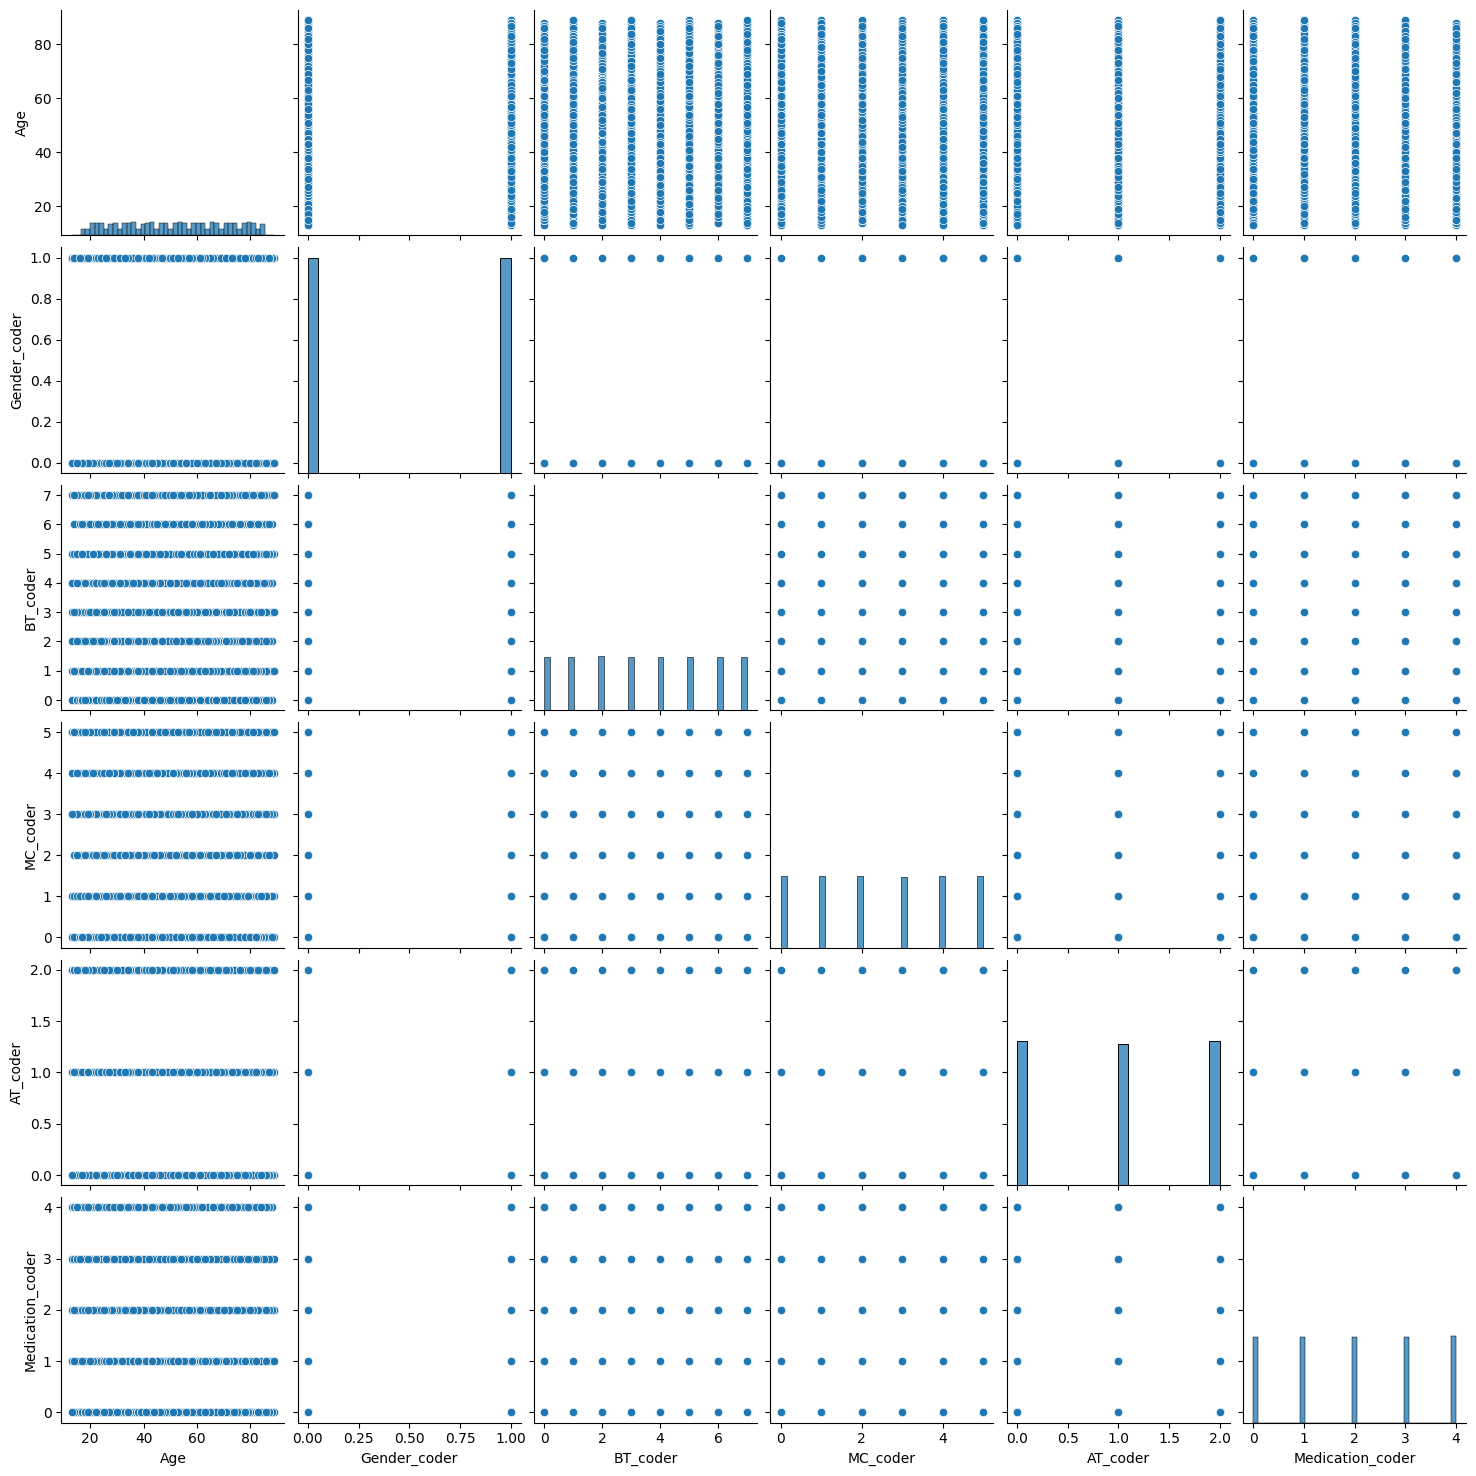

<Figure size 640x480 with 0 Axes>

In [54]:
#PairPlot
plt.figure(figsize=(14, 8))
sns.pairplot(X)
plt.show()
plt.savefig('images/pair_plot.png')

In [55]:
data['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

<h3>Training and Modelling</h3>

<h4>As you see aboce the dataset is balanced i will not use any Over sampling or under sampling techniques</h4>

<h4> Splitting the data</h4>

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55500 entries, Bobby JacksOn to jAMES GARCiA
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                55500 non-null  int64         
 1   Date of Admission  55500 non-null  datetime64[ns]
 2   Discharge Date     55500 non-null  datetime64[ns]
 3   Gender_coder       55500 non-null  float64       
 4   BT_coder           55500 non-null  float64       
 5   MC_coder           55500 non-null  float64       
 6   AT_coder           55500 non-null  float64       
 7   Medication_coder   55500 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1)
memory usage: 5.8+ MB


In [57]:
X['Admission'] = X['Date of Admission'].astype('int64').astype('float64')

In [58]:
X['Discharge'] = X['Discharge Date'].astype('int64').astype('float64')

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55500 entries, Bobby JacksOn to jAMES GARCiA
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                55500 non-null  int64         
 1   Date of Admission  55500 non-null  datetime64[ns]
 2   Discharge Date     55500 non-null  datetime64[ns]
 3   Gender_coder       55500 non-null  float64       
 4   BT_coder           55500 non-null  float64       
 5   MC_coder           55500 non-null  float64       
 6   AT_coder           55500 non-null  float64       
 7   Medication_coder   55500 non-null  float64       
 8   Admission          55500 non-null  float64       
 9   Discharge          55500 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1)
memory usage: 6.7+ MB


In [60]:
X.head()

Age Date of Admission Discharge Date  Gender_coder  BT_coder  \
Name                                                                          
Bobby JacksOn   30        2024-01-31     2024-02-02           0.0       0.0   
LesLie TErRy    62        2019-08-20     2019-08-26           0.0       1.0   
DaNnY sMitH     76        2022-09-22     2022-10-07           1.0       2.0   
andrEw waTtS    28        2020-11-18     2020-12-18           1.0       3.0   
adrIENNE bEll   43        2022-09-19     2022-10-09           1.0       4.0   

               MC_coder  AT_coder  Medication_coder     Admission  \
Name                                                                
Bobby JacksOn       0.0       0.0               0.0  1.706659e+18   
LesLie TErRy        1.0       1.0               1.0  1.566259e+18   
DaNnY sMitH         1.0       1.0               2.0  1.663805e+18   
andrEw waTtS        2.0       2.0               1.0  1.605658e+18   
adrIENNE bEll       0.0       0.0               3.0  1.663546e+18   

                  Discharge  
Name                         
Bobby JacksOn  1.706832e+18  
LesLie TErRy   1.566778e+18  
DaNnY sMitH    1.665101e+18  
andrEw waTtS   1.608250e+18  
adrIENNE bEll  1.665274e+18

In [61]:
X.drop(['Date of Admission', 'Discharge Date'], axis=1, inplace=True)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55500 entries, Bobby JacksOn to jAMES GARCiA
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               55500 non-null  int64  
 1   Gender_coder      55500 non-null  float64
 2   BT_coder          55500 non-null  float64
 3   MC_coder          55500 non-null  float64
 4   AT_coder          55500 non-null  float64
 5   Medication_coder  55500 non-null  float64
 6   Admission         55500 non-null  float64
 7   Discharge         55500 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 5.8+ MB


<h4>As you see above when i started the standarlization step it did not convert becasue i had to convert the datetime Dtype to float type.</h4>

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<h4>Standardiazation</h4>

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(scaler.mean_)
print('----------')
print(scaler.scale_)

[5.14244324e+01 5.00036036e-01 3.49282883e+00 2.50154955e+00
 9.92504505e-01 1.99401802e+00 1.63611016e+18 1.63744761e+18]
----------
[1.95481047e+01 4.99999999e-01 2.28656927e+00 1.71796479e+00
 8.18666042e-01 1.41427735e+00 4.55979907e+16 4.56049274e+16]


<h3> BaseLine Model Using Dummy CLassifier</h3>

In [65]:
dummy_clf = DummyClassifier().fit(X_train_scaled, y_train)
baseline_score = dummy_clf.score(X_test_scaled, y_test)

print(baseline_score)

0.33974774774774774


<h4>Considering 2 Default Models : 

1. Logistic Regression
2. Decision Trees

</h4>

In [66]:
#Logistic Regression: 
# Getting training score and testing for comparison
lr_pipe = Pipeline([('lr', LogisticRegression())])
lr_pipe.fit(X_train_scaled, y_train)
lr_pipe_acc_test = lr_pipe.score(X_test_scaled, y_test)
lr_pipe_acc_training = lr_pipe.score(X_train_scaled, y_train)

print(f'Train_Score: {lr_pipe_acc_training: .2f}\nTest_Score: {lr_pipe_acc_test: .2f}')

Train_Score:  0.34
Test_Score:  0.33


In [67]:
# Logistic Regression Perfomance Metrics
y_pred = lr_pipe.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.32756756756756755
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.38      0.35      4652
           1       0.33      0.29      0.31      4714
           2       0.31      0.32      0.31      4509

    accuracy                           0.33     13875
   macro avg       0.33      0.33      0.33     13875
weighted avg       0.33      0.33      0.33     13875



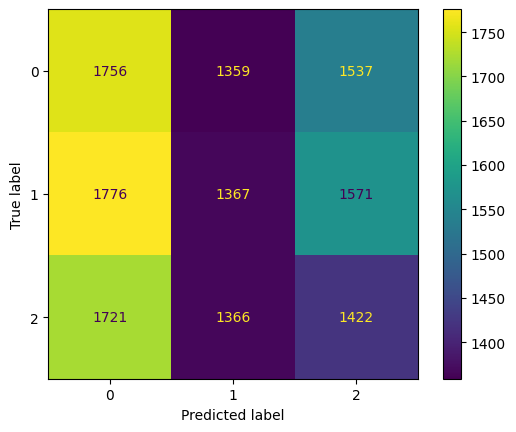

<class 'numpy.ndarray'>


In [68]:
#Confusion Matrix 
confusion_mat = confusion_matrix(y_test, y_pred, labels = [0, 1, 2])
dist = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['0', '1', '2'])
dist.plot()
plt.show()

# Answer check
print(type(confusion_mat))

<h4>ROC_AUC Curve for Class 0 (Normal)</h4>

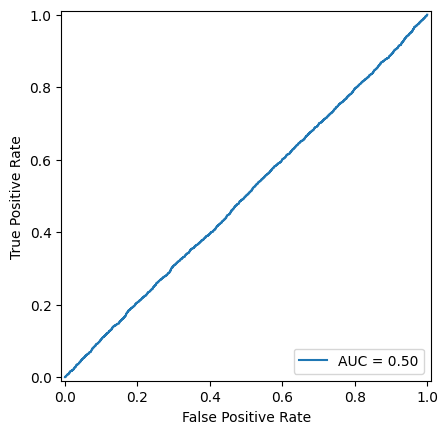

<Figure size 640x480 with 0 Axes>

In [69]:
# ROC Curve Logistic Regression
y_score = lr_pipe.predict_proba(X_test_scaled)[:, 0]
fpr, tpr, thresholds = roc_curve( y_test, y_score, pos_label=0)
roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_value)
disp2.plot()
plt.show()
plt.savefig('images/roc_curve1.png')

#fp = conf_matrix_lr[0][1]
#fn = conf_matrix_lr[1][0]
#auc = round(roc_auc_value, 2)

#fp, fn, auc

In [70]:
#Decision Tree
# Getting training score and testing for comparison
dtree_pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42))])
dtree_pipe.fit(X_train_scaled, y_train)
dtree_pipe_acc_test = dtree_pipe.score(X_test_scaled, y_test)
dtree_pipe_acc_training = dtree_pipe.score(X_train_scaled, y_train)

print(f'Train_Score: {dtree_pipe_acc_training: .2f}\nTest_Score: {dtree_pipe_acc_test: .2f}')

Train_Score:  1.00
Test_Score:  0.37


In [71]:
# Decision Tree Perfomance Metrics :
y_pred = dtree_pipe.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.3687207207207207
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.37      0.37      4652
           1       0.38      0.37      0.37      4714
           2       0.36      0.37      0.36      4509

    accuracy                           0.37     13875
   macro avg       0.37      0.37      0.37     13875
weighted avg       0.37      0.37      0.37     13875



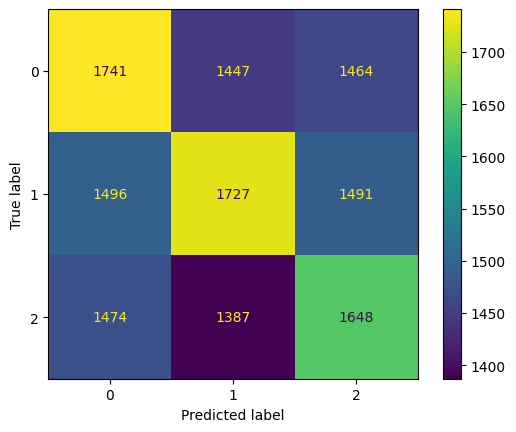

<class 'numpy.ndarray'>


In [72]:
#Confusion Matrix 
confusion_mat = confusion_matrix(y_test, y_pred, labels = [0, 1, 2])
dist = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['0', '1', '2'])
dist.plot()
plt.show()

# Answer check
print(type(confusion_mat))

<h4>ROC_AUC Curve for Class 1 (Abnormal)</h4>

<h4>Using LabelBinarizer for One VS Rest Multi class </h4>

In [73]:
y_score_new = lr_pipe.predict_proba(X_test_scaled)

In [74]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(13875, 3)

In [75]:
label_binarizer.transform([1])

array([[0, 1, 0]])

In [76]:
class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

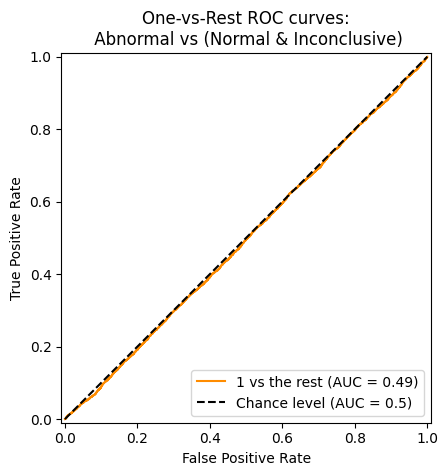

In [77]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score_new[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\n Abnormal vs (Normal & Inconclusive)",
)

<h3>Atempting to use Logistic Regression and decision tree with Grid search and hyperparameters for better results</h3>

In [78]:
#Logistic Regression with GridSearchCV and different hyperparameters
lr_pipe_params = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'sag', multi_class = 'multinomial',
                                                                           max_iter = 1000, random_state = 42)
lr_pipe_params.fit(X_train_scaled, y_train)
lr_params_training_score = lr_pipe_params.score(X_train_scaled, y_train)
lr_params_test_score = lr_pipe_params.score(X_test_scaled, y_test)
                    
print(f'Train_Score: {lr_params_training_score: .2f}\nTest_Score: {lr_params_test_score: .2f}')

Train_Score:  0.34
Test_Score:  0.33


In [79]:
# Logistic Regression Perfomance Metrics:
lr_predict_params = lr_pipe_params.predict(X_test_scaled)

# evaluate the model
report_lr_params = classification_report(y_test, lr_predict_params)

print("Classification Report:")
print(report_lr_params)

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.38      0.36      4652
           1       0.33      0.29      0.31      4714
           2       0.31      0.31      0.31      4509

    accuracy                           0.33     13875
   macro avg       0.33      0.33      0.33     13875
weighted avg       0.33      0.33      0.33     13875



<h3> Trying the OnevsRestClassifier for Multiclass classification problem</h3>

In [80]:
from sklearn.utils.class_weight import compute_sample_weight
compute_sample_weight(class_weight="balanced", y=y)

array([0.99908192, 1.00784485, 0.99908192, ..., 0.99318194, 0.99318194,
       0.99318194])

In [81]:
#Logistic Regression with OnevsRestClassifier
ovr_clf = OneVsRestClassifier(LogisticRegression(C = 0.1, penalty = 'l1', solver = 'saga',
                                                                           max_iter = 1000, random_state = 42))
ovr_clf.fit(X_train_scaled, y_train)
ovr_clf_training_score = ovr_clf.score(X_train_scaled, y_train)
ovr_clf_test_score = ovr_clf.score(X_test_scaled, y_test)

#sample_weight=[0.99, 0.99, 1.00]
print(f'Train_Score: {ovr_clf_training_score: .2f}\nTest_Score: {ovr_clf_test_score: .2f}')

Train_Score:  0.34
Test_Score:  0.33


In [82]:
# Logistic Regression Perfomance Metrics:
lr_ovr_clf = ovr_clf.predict(X_test_scaled)

# evaluate the model
report_ovr_clf = classification_report(y_test, lr_ovr_clf)

print("Classification Report:")
print(report_ovr_clf)

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.38      0.36      4652
           1       0.33      0.28      0.31      4714
           2       0.31      0.31      0.31      4509

    accuracy                           0.33     13875
   macro avg       0.33      0.33      0.33     13875
weighted avg       0.33      0.33      0.33     13875



<h3>Decision Tree</h3>

In [83]:
# Decision Tree with Hyperparametrs
params = {'max_depth': [1,5,8,10],
         'min_samples_split': [0.1, 3, 0.05],
          'criterion': ['gini','entropy'],
          'min_samples_leaf': [2,3,5,7],
          'ccp_alpha' : [0.1, 0.4, 0.6]
         }

In [84]:
dtree = DecisionTreeClassifier()

In [85]:
dt_params = GridSearchCV(dtree, param_grid=params, cv=5).fit(X_train_scaled, y_train)
best_score = dt_params.best_score_
best_params = dt_params.best_params_
grid_train_acc = dt_params.score(X_train_scaled, y_train)
grid_test_acc = dt_params.score(X_test_scaled, y_test)
print(f'Best score: {best_score}')
print(f'Best params: {best_params}')
print(f'Training Score: {grid_train_acc}')
print(f'Test Score: {grid_test_acc}')

Best score: 0.33424624624624627
Best params: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 0.1}
Training Score: 0.33424624624624627
Test Score: 0.33974774774774774


In [86]:
# Decision Tree Perfomance Metrics:
dt_predict_params = dt_params.predict(X_test_scaled)

# evaluate the model
report_dt_params = classification_report(y_test, dt_predict_params)

print("Classification Report:")
print(report_dt_params)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4652
           1       0.34      1.00      0.51      4714
           2       0.00      0.00      0.00      4509

    accuracy                           0.34     13875
   macro avg       0.11      0.33      0.17     13875
weighted avg       0.12      0.34      0.17     13875



C:\Users\pooja\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\pooja\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\pooja\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<h4>An observation when not using cross validation , the class 0 and class 2 had a f1_score of zero with a warning, however when attempted to use cross validation the f1_score for 0 and 1 are positive</h4>

<h3> There is no improvement while testing for Logictic Regressiona nd Decision Tree with Grid search and hyper parameters. Hence trying HalvingRandomSearchCV: Useful when combining the benefits of randomness and resource-efficient exploration.</h3>

In [87]:
params = {'max_depth': [1,5,8,10],
         'min_samples_split': [0.1, 0.2, 0.05],
          'criterion': ['gini','entropy'],
          'min_samples_leaf': [1,3,5,7]
         }

In [88]:
results = HalvingRandomSearchCV(dtree, param_distributions=params, cv = 5).fit(X_train_scaled, y_train)
best_score = results.best_score_
best_params = results.best_params_
print(f'Best score: {best_score}')
print(f'Best params: {best_params}')

C:\Users\pooja\anaconda3\envs\DeepLearning\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 96 is smaller than n_iter=1387. Running 96 iterations. For exhaustive searches, use GridSearchCV.



Best score: 0.3267489711934156
Best params: {'min_samples_split': 0.05, 'min_samples_leaf': 1, 'max_depth': 1, 'criterion': 'entropy'}


<h3>Working with Halving Random Search has no much impact hence moving to ensemble techniques to see the model improvement</h3>

<h3>Random Forest</h3>

In [89]:
rf_clf = RandomForestClassifier(n_estimators=100, max_features='log2')
rf_clf.fit(X_train_scaled, y_train)

rf_train_acc = rf_clf.score(X_train_scaled, y_train)
rf_test_acc = rf_clf.score(X_test_scaled, y_test)

print(f'Training Score: {rf_train_acc}')
print(f'Test Score: {rf_test_acc}')

Training Score: 1.0
Test Score: 0.41102702702702704


In [90]:
# Random Forest Perfomance Metrics:
rf_predict_resampled = rf_clf.predict(X_test_scaled)

# evaluate the model
report_rf = classification_report(y_test, rf_predict_resampled)

print("Classification Report:")
print(report_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.42      0.41      4652
           1       0.42      0.41      0.42      4714
           2       0.40      0.40      0.40      4509

    accuracy                           0.41     13875
   macro avg       0.41      0.41      0.41     13875
weighted avg       0.41      0.41      0.41     13875



<h3>BalancedRandom Forest</h3>

<h5> 
Make Classification API [ Use make_classification ]
    
    This is the most sophisticated scikit api for data generation and it comes with all bells and whistles. It allows you to have multiple features. Also allows you to add noise and imbalance to your data.
    
    Some of the more nifty features include adding Redundant features which are basically Linear combination of existing features. Adding Non-Informative features to check if model overfits these useless features. Adding directly repeated features as well.
    
    Also to increase complexity of classification you can have multiple clusters of your classes and decrease the separation between classes to force complex non-linear boundary for classifier.
</h5>

In [91]:
X, y = make_classification(n_samples=41625, n_classes=3,n_features =6,
                           n_informative=4, weights=[0.33, 0.33, 0.34],
                           n_clusters_per_class=3,random_state=42)
brf_clf = BalancedRandomForestClassifier(
    sampling_strategy="all", replacement=True, max_depth=2, random_state=0,
    bootstrap=False)
brf_clf.fit(X, y)

BalancedRandomForestClassifier(bootstrap=False, max_depth=2, random_state=0,
                               replacement=True, sampling_strategy='all')

In [92]:
brf_train_acc = brf_clf.score(X, y)
#brf_test_acc = brf_clf.score(X_test_scaled, y_test)

print(f'Training Score: {brf_train_acc}')
#print(f'Test Score: {rf_test_acc}')

Training Score: 0.6864624624624625


In [93]:
# BalancedRandom Forest Perfomance Metrics:
brf_predict_resampled = brf_clf.predict(X)

# evaluate the model
report_brf = classification_report(y, brf_predict_resampled)

print("Classification Report:")
print(report_brf)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73     13759
           1       0.63      0.73      0.68     13710
           2       0.73      0.59      0.65     14156

    accuracy                           0.69     41625
   macro avg       0.69      0.69      0.69     41625
weighted avg       0.69      0.69      0.69     41625



In [94]:
X_train_scaled.shape

(41625, 8)

In [95]:
brf_clf_og = BalancedRandomForestClassifier(
    sampling_strategy="all", replacement=True, max_depth=2, random_state=42,
    bootstrap=False)
brf_clf_og.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(bootstrap=False, max_depth=2, random_state=42,
                               replacement=True, sampling_strategy='all')

In [96]:
# BalancedRandom Forest Perfomance Metrics:
brf_predict_og = brf_clf_og.predict(X_test_scaled)

# evaluate the model
report_brf_og = classification_report(y_test, brf_predict_og)

print("Classification Report:")
print(report_brf_og)

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.37      0.35      4652
           1       0.34      0.25      0.29      4714
           2       0.32      0.39      0.35      4509

    accuracy                           0.33     13875
   macro avg       0.34      0.33      0.33     13875
weighted avg       0.34      0.33      0.33     13875



<h3> As you see above i have tried to make use of classification API to imbance the dataste for better results and it helped impove the model, as the classifier ran without classification API had no improvemnts with the f1_score</h3>

<h3>EasyEnsemble</h3>

<h4>This algorithm is known as EasyEnsemble [1]. The classifier is an ensemble of AdaBoost learners trained on different balanced bootstrap samples. The balancing is achieved by random under-sampling.</h4>

In [97]:
X1, y1 = make_classification(n_classes=3, class_sep=2,
weights=[0.33, 0.33, 0.34], n_informative=3, n_redundant=1, flip_y=0,
n_features=6, n_clusters_per_class=1, n_samples=41625, random_state=42)

print('Original dataset shape %s' % Counter(y1))

Original dataset shape Counter({2: 14152, 0: 13737, 1: 13736})


In [98]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X1, y1,test_size = 0.25,
                                                    random_state=42,)
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train_new, y_train_new)

EasyEnsembleClassifier(random_state=42)

In [99]:
y_pred_eec = eec.predict(X_test_new)
print(confusion_matrix(y_test_new, y_pred_eec))

[[3417    6    7]
 [  24 3462    0]
 [  66    7 3418]]


In [100]:
eec_train_acc = brf_clf.score(X_train_new, y_train_new)
eec_test_acc = brf_clf.score(X_test_new, y_test_new)

print(f'Training Score: {eec_train_acc}')
print(f'Test Score: {eec_test_acc}')

Training Score: 0.2701966814017554
Test Score: 0.26780051888152206


In [101]:
# EasyEnsemble Forest Perfomance Metrics:
eec_predict_og = eec.predict(X_test_new)

# evaluate the model
report_eec_og = classification_report(y_test_new, eec_predict_og)

print("Classification Report:")
print(report_eec_og)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3430
           1       1.00      0.99      0.99      3486
           2       1.00      0.98      0.99      3491

    accuracy                           0.99     10407
   macro avg       0.99      0.99      0.99     10407
weighted avg       0.99      0.99      0.99     10407



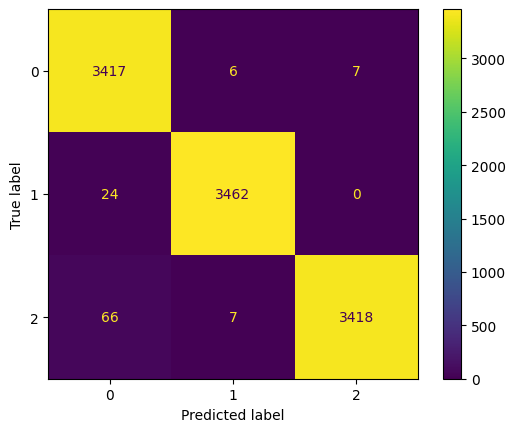

<class 'numpy.ndarray'>


In [102]:
#Confusion Matrix 
confusion_mat_eec = confusion_matrix(y_test_new, y_pred_eec, labels = [0, 1, 2])
dist = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_eec, display_labels=['0', '1', '2'])
dist.plot()
plt.show()

# Answer check
print(type(confusion_mat))

<h3>As you see the report above for easy ensemble it has a drastic impact and the accuracy is impoved to 99% including macro avg and weighted avg. However the dataset is made imbalanced to impove the accuracy.</h3>

<h4> Using AdaBoost for binary classification is very effective so , i wanted to check how the data will be trained with Ada Boost.</h4>

<h3> AdaBoost </h3>

In [103]:
#AdaBoost
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
)
ada_clf.fit(X_train_scaled, y_train)

ada_train_acc = ada_clf.score(X_train_scaled, y_train)
ada_test_acc = ada_clf.score(X_test_scaled, y_test)

print(f'Training Score: {ada_train_acc}')
print(f'Test Score: {ada_test_acc}')

Training Score: 0.35485885885885887
Test Score: 0.3354954954954955


In [104]:
# Adaboost Perfomance Metrics:
ada_predict_resampled = ada_clf.predict(X_test_scaled)

# evaluate the model
report_ada = classification_report(y_test, ada_predict_resampled)

print("Classification Report:")
print(report_ada)

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.35      0.35      4652
           1       0.34      0.32      0.33      4714
           2       0.32      0.33      0.32      4509

    accuracy                           0.34     13875
   macro avg       0.34      0.34      0.34     13875
weighted avg       0.34      0.34      0.34     13875



<h3>AdaBoost has also not been a good model that can give better accuracy results.</h3>

<h3>XGBoost</h3>

<h5>As XGBoost uses optimized distributed gradient boosting techinque</h5>

In [105]:
# XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train_scaled, y_train)

xgb_clf_train_acc = xgb_clf.score(X_train_scaled, y_train)
xgb_clf_test_acc = xgb_clf.score(X_test_scaled, y_test)

print(f'Training Score: {xgb_clf_train_acc}')
print(f'Test Score: {xgb_clf_test_acc}')

C:\Users\pooja\anaconda3\envs\DeepLearning\Lib\site-packages\xgboost\core.py:158: UserWarning:

[22:25:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Training Score: 0.6141981981981982
Test Score: 0.3365765765765766


In [106]:
# Adaboost Perfomance Metrics:
xgb_predict = xgb_clf.predict(X_test_scaled)

# evaluate the model
report_xgb = classification_report(y_test, xgb_predict)

print("Classification Report:")
print(report_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.37      0.36      4652
           1       0.34      0.34      0.34      4714
           2       0.32      0.31      0.31      4509

    accuracy                           0.34     13875
   macro avg       0.34      0.34      0.34     13875
weighted avg       0.34      0.34      0.34     13875



<h3>Use Simple Neural networks with Keras </h3>

<h4>Multi-Class Classification with keras</h4>

<h5> Present the network with a one hot encoded version of the target[y]. This can be accomplished using the to_categorical function</h5>

In [107]:
y_ohe = to_categorical(y)
print(y_ohe[:5])

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


<h5>Network Architecture</h5>

In [108]:
#Create a Sequential model named model with one hidden layer containing 100 nodes using the relu activation function. For the output layer, be sure to
#use the softmax activation with 3 nodes (because of the three classes) instead of the sigmoid used for binary classification.

tf.random.set_seed(42)
model = Sequential([Dense(100, activation = 'relu'),
                   Dense(3, activation = 'softmax')])

<h5>Compiling the model</h5>

In [109]:
tf.random.set_seed(42)
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])

<h5>Fitting the model</h5>

In [110]:
tf.random.set_seed(42)
history = model.fit(X, y_ohe, validation_split=0.2, epochs = 100, verbose = 0)

<h5>Evaluation</h5>

0.8891891837120056
0.8803603649139404


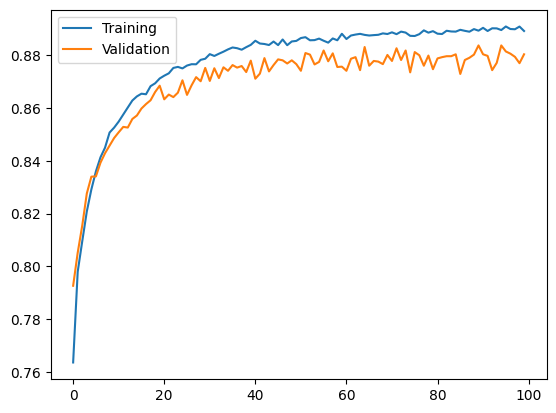

In [111]:
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

accuracies = history.history['accuracy']
validation_accuracies = history.history['val_accuracy']

## Uncomment to visualize
plt.plot(accuracies, label = 'Training')
plt.plot(validation_accuracies, label = 'Validation')
plt.legend();
plt.show()

<h4> Attempted a Simple neural network with Keras. Created a Sequential model named model with one hidden layer containing 100 nodes using the relu activation function. For the output layer, be sure to use the softmax activation with 3 nodes (because of the three classes) instead of the sigmoid used for binary classification. We observe the accuracies for Trainig and Validation data with a 88%. This can be considered a good model as the 88% accuracy margin can be a predicting model which can be concluded as not overfitting nor underfitting.</h4>

<h4> Hyperparameter Tuning with keras</h4>

In [112]:
tf.random.set_seed(42)
def build_function(neurons = 1):
    model = Sequential()
    model.add(Dense(neurons, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
ans = build_function(neurons = 100)

In [113]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h5>Use the build_function from above to instantiate the KerasClassifier as model with epochs = 10</h5>

In [114]:
tf.random.set_seed(42)
clf_model = KerasClassifier(build_fn=build_function, 
                        epochs = 10, 
                       verbose = 0,
                       validation_split=0.2)
history = clf_model.fit(X_scaled, y)

print(clf_model.score(X_scaled, y))

C:\Users\pooja\AppData\Local\Temp\ipykernel_15984\4043028115.py:2: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



0.5758798718452454


<h4> Performing the Grid Search with kerasClassifier</h4>

In [115]:
params = ''
ann_grid = ''

tf.random.set_seed(42)
params = {'neurons': [10, 50, 100]}
ann_grid = GridSearchCV(clf_model, param_grid=params)

ann_grid

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018B440F0950>,
             param_grid={'neurons': [10, 50, 100]})

<h5> Fit and Evaluate the model </h5>

In [116]:
tf.random.set_seed(42)
params = {'neurons': [10, 50, 100]}
ann_grid = GridSearchCV(clf_model, param_grid=params)
grid_score = ann_grid.fit(X_scaled, y)

print(grid_score.score(X_scaled, y))

0.8489128947257996


<h4> Also, attempted Hyperparameter Tuning with KerasClassifier which did not improve the model and had a 57% accuracy, which can still be considered a good model and Grid SearchCV with KerasClassifier that has multiple parameters as neurons which gave a much better accuracy then just Keras CLassifier with a 84% </h4>

In [117]:
# print(grid_score.history['accuracy'][-1])
# print(grid_score.history['val_accuracy'][-1])

# accuracies_grid = grid_score.history['accuracy']
# validation_accuracies__grid = grid_score.history['val_accuracy']

# ## Uncomment to visualize
# plt.plot(accuracies_grid, label = 'Training')
# plt.plot(validation_accuracies_grid, label = 'Validation')
# plt.legend();
# plt.show()

<h3>Use Simple Neural networks with PyTorch</h3>

<h4> Set the Device </h4>

You should determine if a GPU is available and set your device accordingly.

In [118]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [121]:
data.head()

Age Date of Admission Discharge Date  Test Results  \
Name                                                                
Bobby JacksOn   30        2024-01-31     2024-02-02        Normal   
LesLie TErRy    62        2019-08-20     2019-08-26  Inconclusive   
DaNnY sMitH     76        2022-09-22     2022-10-07        Normal   
andrEw waTtS    28        2020-11-18     2020-12-18      Abnormal   
adrIENNE bEll   43        2022-09-19     2022-10-09      Abnormal   

               Gender_coder  BT_coder  MC_coder  AT_coder  Medication_coder  
Name                                                                         
Bobby JacksOn           0.0       0.0       0.0       0.0               0.0  
LesLie TErRy            0.0       1.0       1.0       1.0               1.0  
DaNnY sMitH             1.0       2.0       1.0       1.0               2.0  
andrEw waTtS            1.0       3.0       2.0       2.0               1.0  
adrIENNE bEll           1.0       4.0       0.0       0.0               3.0

In [122]:
X1 = data.drop('Test Results', axis=1)
y1 = data['Test Results']

In [123]:
X1.head()

Age Date of Admission Discharge Date  Gender_coder  BT_coder  \
Name                                                                          
Bobby JacksOn   30        2024-01-31     2024-02-02           0.0       0.0   
LesLie TErRy    62        2019-08-20     2019-08-26           0.0       1.0   
DaNnY sMitH     76        2022-09-22     2022-10-07           1.0       2.0   
andrEw waTtS    28        2020-11-18     2020-12-18           1.0       3.0   
adrIENNE bEll   43        2022-09-19     2022-10-09           1.0       4.0   

               MC_coder  AT_coder  Medication_coder  
Name                                                 
Bobby JacksOn       0.0       0.0               0.0  
LesLie TErRy        1.0       1.0               1.0  
DaNnY sMitH         1.0       1.0               2.0  
andrEw waTtS        2.0       2.0               1.0  
adrIENNE bEll       0.0       0.0               3.0

In [124]:
X1['Admission'] = X1['Date of Admission'].astype('int64').astype('float64')

In [125]:
X1['Discharge'] = X1['Discharge Date'].astype('int64').astype('float64')

In [126]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55500 entries, Bobby JacksOn to jAMES GARCiA
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                55500 non-null  int64         
 1   Date of Admission  55500 non-null  datetime64[ns]
 2   Discharge Date     55500 non-null  datetime64[ns]
 3   Gender_coder       55500 non-null  float64       
 4   BT_coder           55500 non-null  float64       
 5   MC_coder           55500 non-null  float64       
 6   AT_coder           55500 non-null  float64       
 7   Medication_coder   55500 non-null  float64       
 8   Admission          55500 non-null  float64       
 9   Discharge          55500 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1)
memory usage: 6.7+ MB


In [128]:
X1.drop(['Date of Admission', 'Discharge Date'], axis=1, inplace=True)

In [129]:
X1.head()

Age  Gender_coder  BT_coder  MC_coder  AT_coder  \
Name                                                             
Bobby JacksOn   30           0.0       0.0       0.0       0.0   
LesLie TErRy    62           0.0       1.0       1.0       1.0   
DaNnY sMitH     76           1.0       2.0       1.0       1.0   
andrEw waTtS    28           1.0       3.0       2.0       2.0   
adrIENNE bEll   43           1.0       4.0       0.0       0.0   

               Medication_coder     Admission     Discharge  
Name                                                         
Bobby JacksOn               0.0  1.706659e+18  1.706832e+18  
LesLie TErRy                1.0  1.566259e+18  1.566778e+18  
DaNnY sMitH                 2.0  1.663805e+18  1.665101e+18  
andrEw waTtS                1.0  1.605658e+18  1.608250e+18  
adrIENNE bEll               3.0  1.663546e+18  1.665274e+18

In [148]:
y1.head()

Name
Bobby JacksOn          Normal
LesLie TErRy     Inconclusive
DaNnY sMitH            Normal
andrEw waTtS         Abnormal
adrIENNE bEll        Abnormal
Name: Test Results, dtype: object

In [149]:
#Mapping the target feature 'y'
target_map_1 = {'Normal': 0, 'Abnormal': 1, 'Inconclusive': 2}

In [150]:
y1 = y1.map(target_map_1)

In [151]:
y1

Name
Bobby JacksOn        0
LesLie TErRy         2
DaNnY sMitH          0
andrEw waTtS         1
adrIENNE bEll        1
                    ..
eLIZABeTH jaCkSOn    1
KYle pEREz           0
HEATher WaNG         1
JENniFER JOneS       1
jAMES GARCiA         1
Name: Test Results, Length: 55500, dtype: int64

In [152]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

<h3> Convert datasets to PyTorch tensors </h3>

In PyTorch, the .to(device) method is used to explicitly move tensors or models to a specific device, either the CPU or a GPU. When you're training neural networks, especially deep ones, computational requirements can be high, and utilizing a GPU can significantly speed up the training process.

In [187]:
X1_train = torch.DoubleTensor(X1_train).to(device)
y1_train = torch.LongTensor(y1_train).to(device)
X1_test = torch.DoubleTensor(X1_test).to(device)
y1_test = torch.LongTensor(y1_test).to(device)

<h4> Define the neural network structure </h4>

Creating a class is a recommended way to define models in PyTorch. The class-based structure allows for organized, modular, and scalable code. You can create more straightforward models using just functions, but using classes provides greater flexibility, especially for complex architectures.

<h4> Notes: </h4>
- 12 and 8 are somewhat arbitrary numbers. In practice, choosing the number of neurons and layers often involves experimentation.
- `nn.Linear` denotes fully connected layers, where each neuron from the previous layer connects to every neuron in the current layer.
- ReLU (Rectified Linear Unit) is a popular choice for hidden layers due to its simplicity and effectiveness.
- The last layer often doesn't use an activation function because the choice of loss function in the next step (criterion) sometimes includes it.
  - For classification tasks with multiple classes, `CrossEntropyLoss` in PyTorch combines a SoftMax activation with a cross-entropy loss.

In [209]:
class healthcare(nn.Module):
    def __init__(self):
        super(healthcare, self).__init__()
        self.fc1 = nn.Linear(8, 12)    # First hidden layer with 12 neurons
        self.fc2 = nn.Linear(12, 8)   # Second hidden layer with 8 neurons
        self.fc3 = nn.Linear(8, 3)    # Output layer with 3 neurons (for the 3 classes)
        self.double()                 #Casts all floating point parameters and buffers to double datatype.
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation function after first hidden layer
        x = torch.relu(self.fc2(x))  # Apply ReLU activation function after second hidden layer
        x = self.fc3(x)              # No activation here as we'll use CrossEntropyLoss
        return x

In [203]:
model = healthcare().to(device)

<h4> Define loss function and optimizer </h4>

In [204]:
criterion = nn.CrossEntropyLoss()               # This combines a SoftMax activation and a cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam optimizer with learning rate of 0.01

<h4> The thought of using Adam algorithm is because Adam is robust and well-suited to a wide range of non-convex optimization problems in the field machine learning </h4>

<h4>Training Loop</h4>

In [205]:
best_val_loss = float('inf')  # Start with a very high initial best loss
patience = 10  # Define how many epochs to wait without improvement
counter = 0  # Initialize counter

for epoch in range(500):   # Increased epochs to ensure convergence with raw data
    optimizer.zero_grad()  # Clear out the gradients from the last step
    out = model(X1_train)   # Forward pass: compute predicted y by passing x to the model
    loss = criterion(out, y1_train) # Compute the loss
    loss.backward()        # Backward pass: compute gradient of the loss with respect to model parameters
    optimizer.step()       # Update model parameters

    # Evaluate the model's performance on the validation data
    # Ensure no gradients are calculated during this step to save computation and memory
    with torch.no_grad():
        val_out = model(X1_test) # Pass the validation data through the model to get predictions.
        val_loss = criterion(val_out, y1_test) # Compute the validation loss based on the model's predictions and true labels of validation data.

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0  # Reset the counter since we have observed an improvement in validation loss.
    else:
        counter += 1  # If validation loss didn't improve, increment the counter.

    # If the number of epochs without improvement exceeds our set patience, stop training.
    if counter >= patience:
        print("Early stopping due to no improvement!")
        break  # Exit the training loop

    if (epoch+1) % 50 == 0:  # Print the loss every 50 epochs
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Early stopping due to no improvement!


<h4> For the Model Training , Testing and Evaluation, we have 3 major categories of implementations: for-loop, foreach (multi-tensor), and fused. The most straightforward implementations are for-loops over the parameters with big chunks of computation.A few of our optimizers have even faster fused implementations, which fuse the big chunks of computation into one kernel. We can think foreach implementations as fusing horizontally and fused implementations as fusing vertically on top of that.

    
    I have considered for loop for the above dataset.
    
</h4>

<h4> Evaluate the model </h4>

In [208]:
with torch.no_grad(): # Disable gradient computation during evaluation to save memory and speed up the process
    test_out = model(X1_test)  # Forward pass: compute predicted outputs by passing test data to the model
    _, predicted = torch.max(test_out, 1) # Get the class labels with the highest predicted probabilities
    accuracy = accuracy_score(y1_test.cpu().numpy(), predicted.cpu().numpy()) # Calculate accuracy by comparing predicted and true labels
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 33.82%


<h3>Deployment
    
     For deploying a PyTorch model
</h3>

In [210]:
# Save the model
torch.save(model.state_dict(), "healthcare_model.pth")

In [211]:
# Load the model for inference
model = healthcare().to(device)
model.load_state_dict(torch.load("healthcare_model.pth"))
model.eval()  # Set the model to evaluation mode

healthcare(
  (fc1): Linear(in_features=8, out_features=12, bias=True)
  (fc2): Linear(in_features=12, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)

In [218]:
# # Make a prediction on new data

# # Suppose you have new data for prediction as a numpy array
new_data = [[76, 1.0, 1.0, 2.0, 2.0, 2.0, 1.663805e+18, 1.665101e+18]]  # Some iris measurements
            #,[2.0, 2.0, 1.663805e+18, 1.665101e+18]]  # Another set of iris measurements

# # Convert the data to a PyTorch tensor
input_tensor = torch.DoubleTensor(new_data)

# # If you used a GPU during training, move the input tensor to the same device
if torch.cpu.is_available():
     input_tensor = input_tensor.to('cpu')

# # Get the model's predictions
with torch.no_grad():  # This ensures that the operation is not tracked by PyTorch's autograd
     outputs = model(input_tensor)

# # Get the predicted classes
_, predicted_classes = torch.max(outputs, 1)

# # Convert predicted classes to a list
predicted_classes = predicted_classes.tolist()

print(predicted_classes)  # This will give you the indices of the predicted classes for each input

[1]


<h3> Sample Deployment when using the model for a API </h3>

<h5> For the below deplyment I will convert the Neural Newtorks with GridSearchCV with Keras CLassifier because that is the bet suited model for further predictions and can be used for the Frondend app prediction. </h5>

In [219]:
import joblib

joblib.dump(ann_grid, "gridscv_keras.sav")
gridscv_keras_model_loaded = joblib.load("gridscv_keras.sav")

<h2> Next Steps to Deply the Above model via a Frond End like StreamLit or MLOps to predict new data and test the model.</h2>